In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import xgboost as xgb

import statsmodels
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [17]:
df_train = pd.read_csv('mercedes-benz-greener-manufacturing/train.csv')
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_test = pd.read_csv('mercedes-benz-greener-manufacturing/test.csv')

<AxesSubplot:>

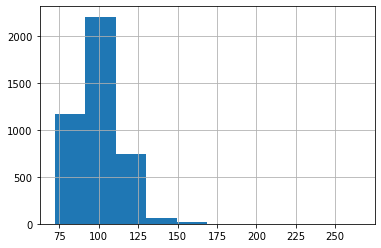

In [28]:
df_train['y'].hist()

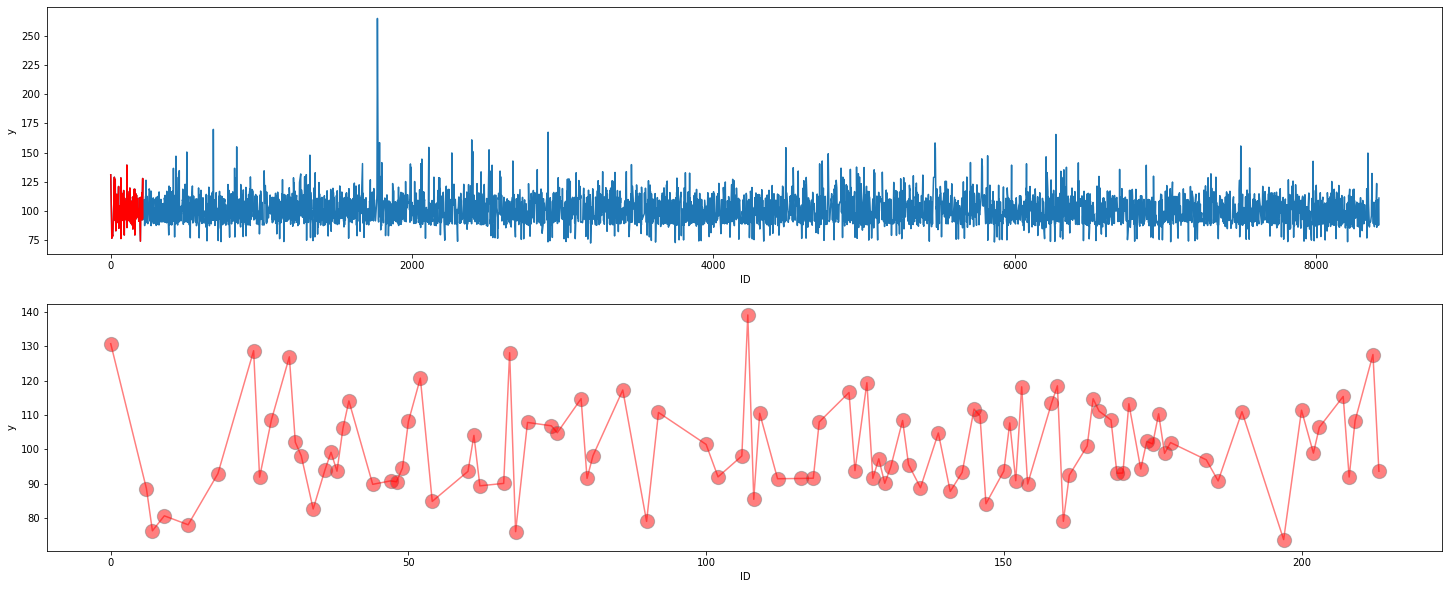

In [153]:
fig,ax = plt.subplots(2,1, figsize = (25,10))
sns.lineplot(data=df_train, x='ID', y='y', ax=ax[0])
sns.lineplot(data=df_train[:100], x='ID', y='y', ax=ax[0], color='red')
sns.scatterplot(data=df_train[:100], x='ID', y='y', ax=ax[1],color='red', s=200, alpha=0.5, edgecolor='grey')
sns.lineplot(data=df_train[:100], x='ID', y='y', ax=ax[1],color='red', alpha=0.5)

plt.show()

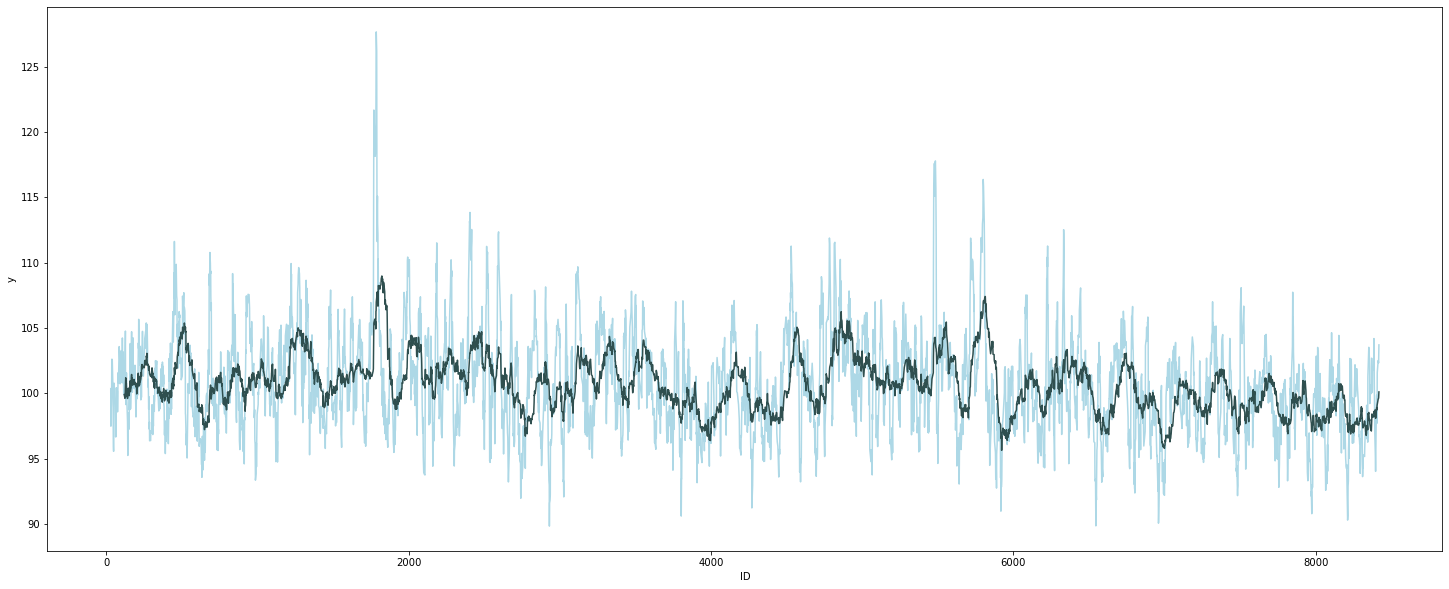

In [404]:
plt.figure(figsize = (25,10))
# sns.lineplot(data=df_train, x='ID', y=df_train['y'].rolling(5).mean(),color='Firebrick')
sns.lineplot(data=df_train, x='ID', y=df_train['y'].rolling(10).mean(),color='lightblue')
sns.lineplot(data=df_train, x='ID', y=df_train['y'].rolling(50).mean(),color='darkslategray')
plt.show()

In [175]:
from sklearn import preprocessing
oe = preprocessing.OrdinalEncoder()

In [277]:
encoder = df_train.drop(['y','ID'], axis=1)
encoder.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


In [278]:
encoder.dtypes.value_counts()

int64     368
object      8
dtype: int64

In [279]:
encoder1 = encoder.select_dtypes(exclude='int64')

In [299]:
encoder1 = oe.fit_transform(encoder1)

In [300]:
encoder1.shape

(4209, 8)

In [301]:
encoder2 = encoder.select_dtypes(include='int64')

In [302]:
encoder2.shape

(4209, 368)

In [303]:
encodedvals = np.append(encoder1,encoder2,axis=1)

In [304]:
encodedvals.astype('int')

array([[32, 23, 17, ...,  0,  0,  0],
       [32, 21, 19, ...,  0,  0,  0],
       [20, 24, 34, ...,  0,  0,  0],
       ...,
       [ 8, 23, 38, ...,  0,  0,  0],
       [ 9, 19, 25, ...,  0,  0,  0],
       [46, 19,  3, ...,  0,  0,  0]])

In [406]:
encodedframe = pd.DataFrame(encodedvals)

,0,1,2,3,4,5,6,7,8,9,...,366,367,368,369,370,371,372,373,374,375
0,32.0,23.0,17.0,0.0,3.0,24.0,9.0,14.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32.0,21.0,19.0,4.0,3.0,28.0,11.0,14.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20.0,24.0,34.0,2.0,3.0,27.0,9.0,23.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,20.0,21.0,34.0,5.0,3.0,27.0,11.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20.0,23.0,34.0,5.0,3.0,12.0,3.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

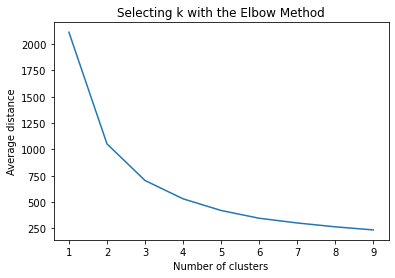

In [588]:
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
clusters=range(1,10)
meandist=[]

# loop through each cluster and fit the model to the train set
# generate the predicted cluster assingment and append the mean 
# distance my taking the sum divided by the shape
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(encodedframe)
    clusassign=model.predict(encodedframe)
    meandist.append(sum(np.min(cdist(encodedframe, model.cluster_centers_, 'euclidean'), axis=1))
    / encodedframe.shape[0])

"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method') 

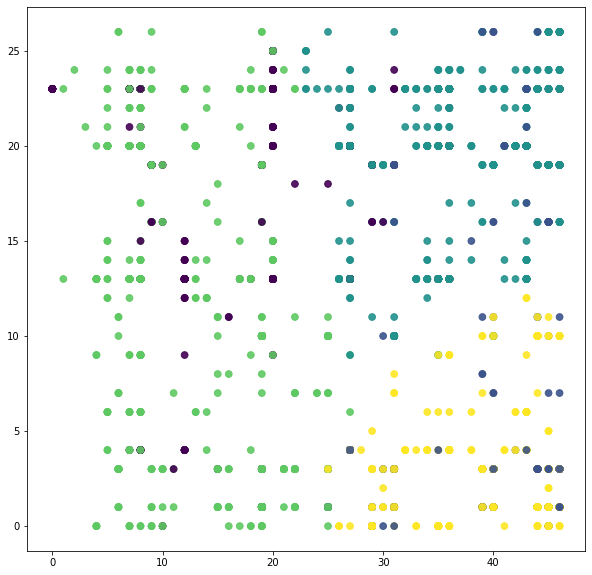

In [495]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters=5, random_state=0)
kfit = k.fit(encodedvals)
kpred = kfit.predict(encodedvals)
plt.figure(figsize=(10,10))
plt.scatter(encodedvals[:, 0], encodedvals[:, 1], c=kpred, s=45, alpha=0.9)

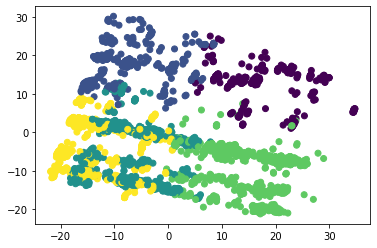

In [311]:
from sklearn.decomposition import PCA # CA from PCA function
pca = PCA(2) # return 2 first canonical variables
pcacols = pca.fit_transform(encodedvals) # fit CA to the train dataset

pcfit = k.fit(encodedvals)
pcpred = pcfit.predict(encodedvals)

plt.scatter( x=pcacols[:,0], y=pcacols[:,1], c=pcpred) 
plt.show() 
#plt.scatter( x=pcacols[:,0], y=pcacols[:,1], c=kpred) no difference

In [593]:
dfnana = pd.DataFrame.from_dict({'A':[1,np.nan,4], 'B':[2,2,np.nan], 'C':[np.nan,4,3]})

In [595]:
dfnana.isna().()

A    1
B    1
C    1
dtype: int64

In [409]:
encodedframe['KLabels'] = pd.Series(kpred, index=encodedframe.index)

In [410]:
encodedframe.head()

,0,1,2,3,4,5,6,7,8,9,...,367,368,369,370,371,372,373,374,375,KLabels
0,32.0,23.0,17.0,0.0,3.0,24.0,9.0,14.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,32.0,21.0,19.0,4.0,3.0,28.0,11.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,20.0,24.0,34.0,2.0,3.0,27.0,9.0,23.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,20.0,21.0,34.0,5.0,3.0,27.0,11.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,20.0,23.0,34.0,5.0,3.0,12.0,3.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [421]:
encodedframe['ID'] = df_train['ID']
encodedframe['y'] = df_train['y']

In [422]:
encodedframe.head()

,0,1,2,3,4,5,6,7,8,9,...,369,370,371,372,373,374,375,KLabels,ID,y
0,32.0,23.0,17.0,0.0,3.0,24.0,9.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,130.81
1,32.0,21.0,19.0,4.0,3.0,28.0,11.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,6,88.53
2,20.0,24.0,34.0,2.0,3.0,27.0,9.0,23.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,7,76.26
3,20.0,21.0,34.0,5.0,3.0,27.0,11.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9,80.62
4,20.0,23.0,34.0,5.0,3.0,12.0,3.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,13,78.02


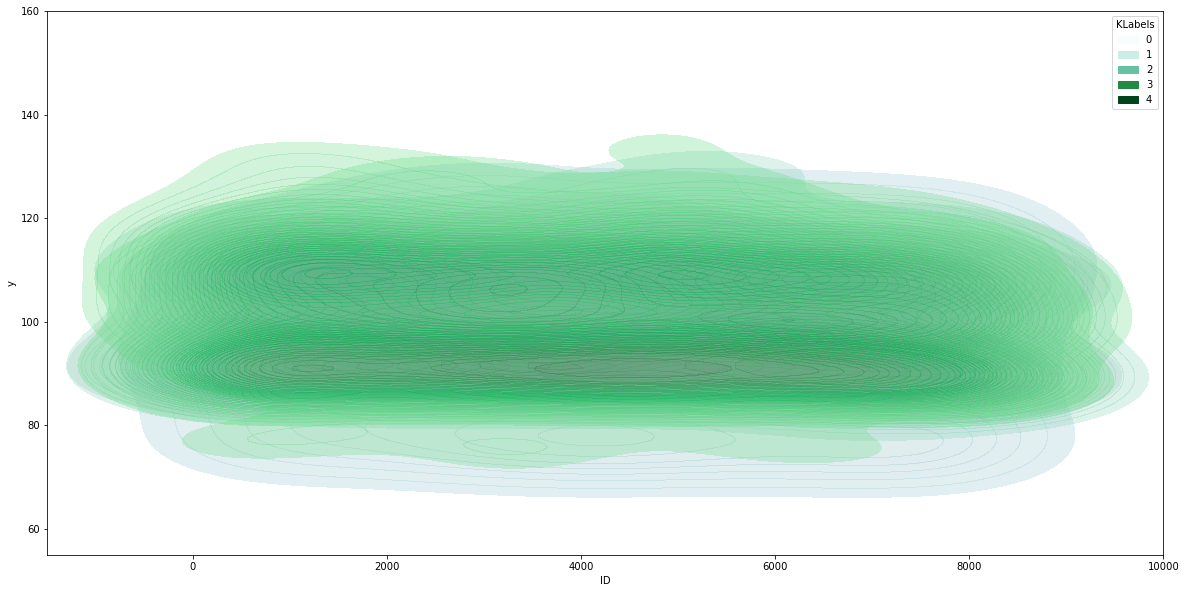

In [524]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=encodedframe, x='ID', y='y', hue='KLabels', levels=40, palette='BuGn', fill=True, alpha=0.3)
plt.ylim([55,160])
plt.xlim([-1500,10000])
plt.show()

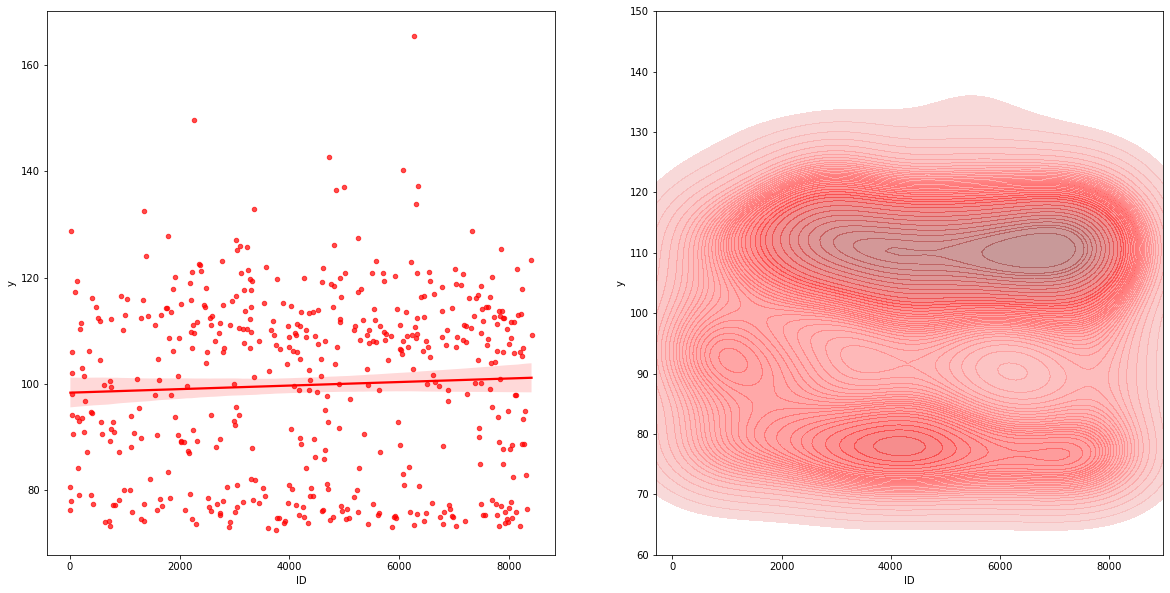

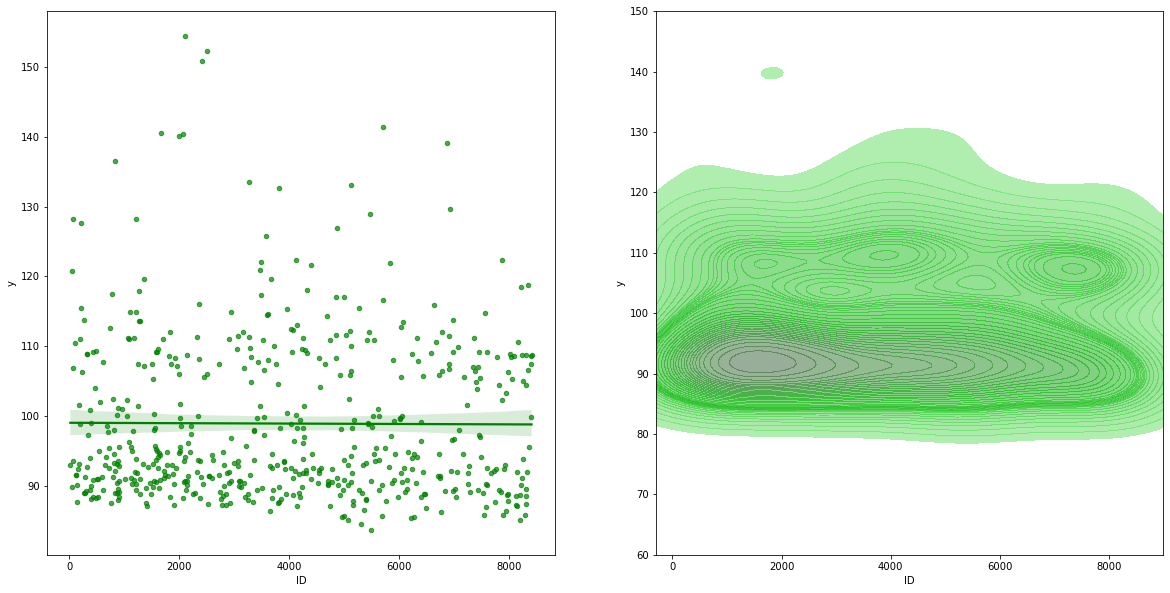

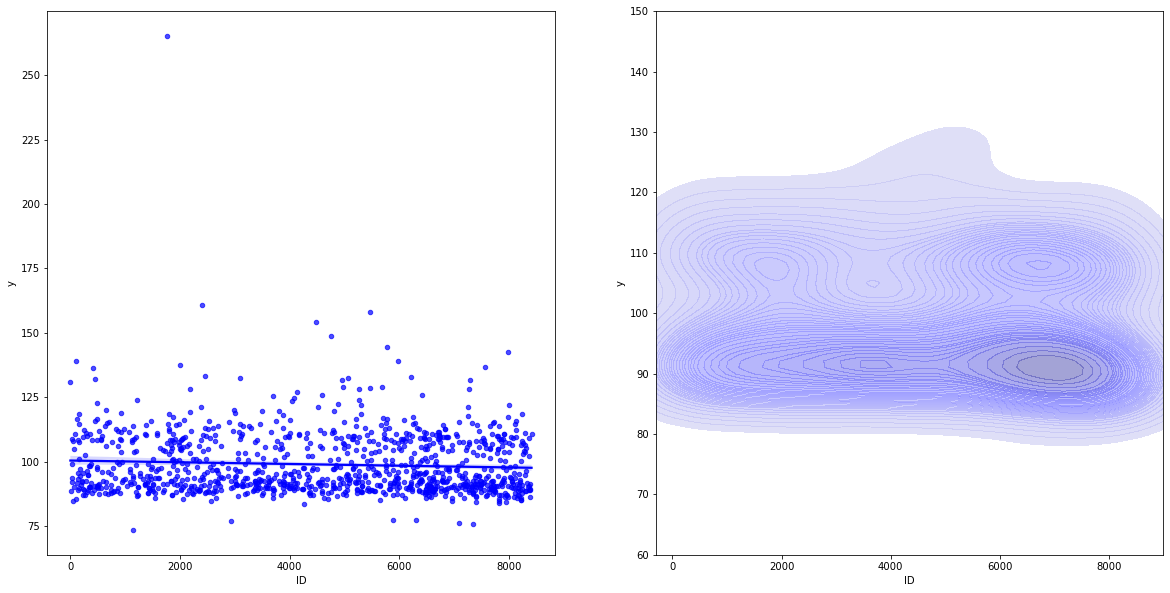

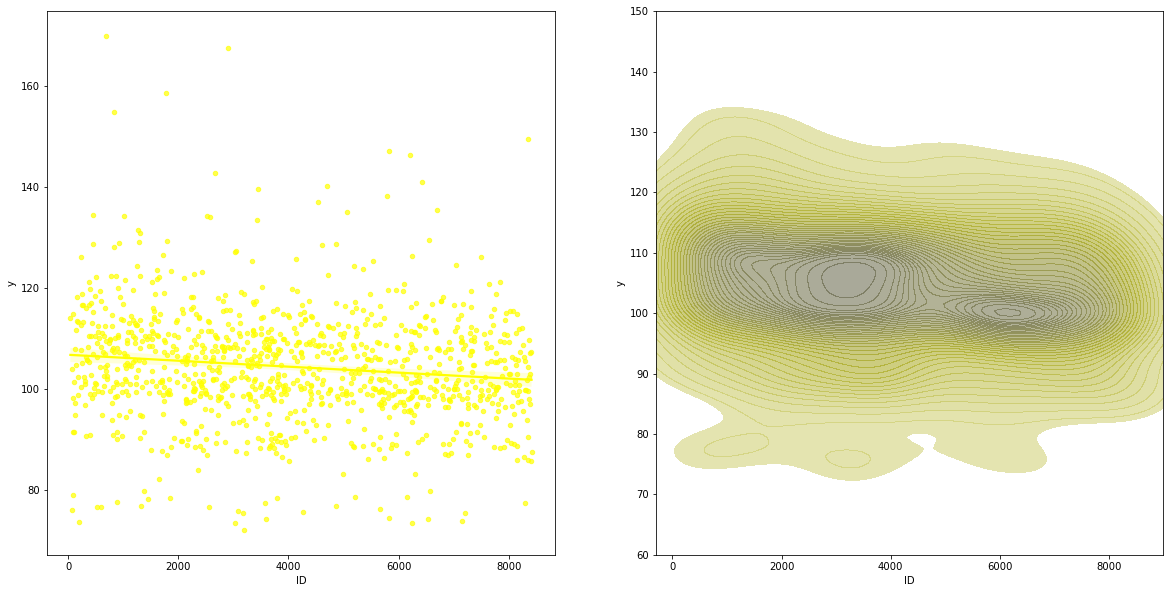

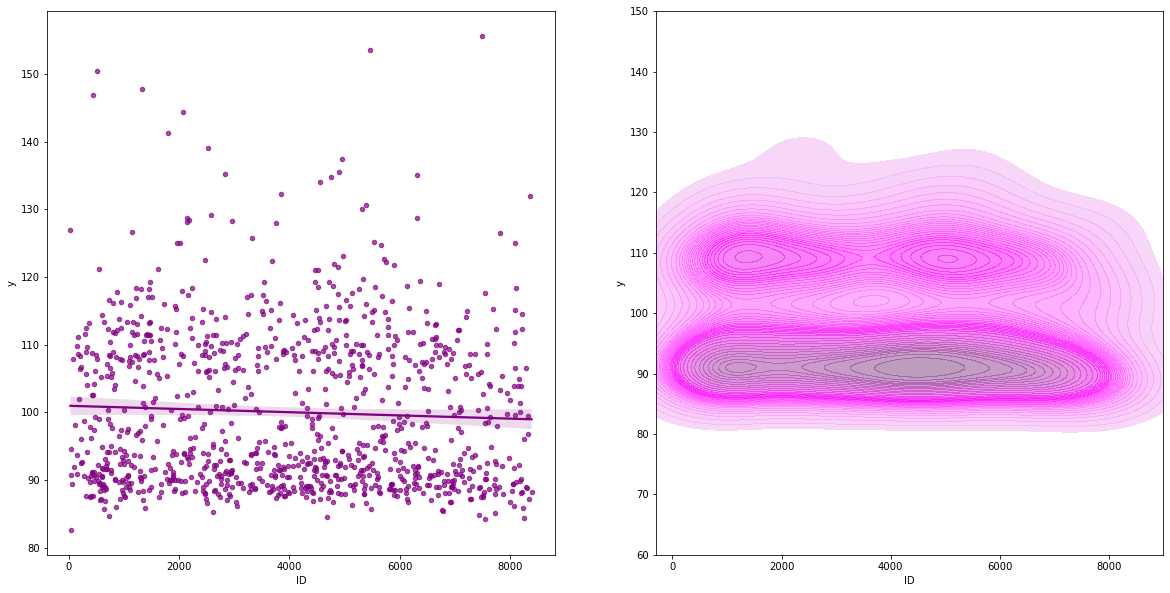

In [547]:
label = []
colors = ['red', 'green', 'blue', 'yellow', 'purple']
for x in range(5):
    label.append(encodedframe.loc[encodedframe['KLabels'] == x])
    fig,ax = plt.subplots(1,2, figsize=(20,10))
    
    plt.ylim([60,150])
    plt.xlim([-300,9000])
    sns.regplot(data=label[x], x='ID', y='y', color=colors[x], ax=ax[0], scatter_kws={'alpha':0.7, 's':20})
    
    plt.ylim([60,150])
    plt.xlim([-300,9000])
    sns.kdeplot(data=label[x], x='ID', y='y', levels=40, color=colors[x], fill=True, alpha=0.5, ax=ax[1])
#     ax[1].ylim([55,160])
#     ax[1].xlim([-1500,10000])
    plt.show()
    

In [491]:
label[0][label[0].columns[:-3]].sum(axis=1).mean()

162.70061099796334

In [448]:
labelmeans = {}
i=0
for x in label:
    labelmeans[i] = x[x.columns[:-3]].sum(axis=1).mean()
    i+=1

In [451]:
df_train['y'].mean()

100.66931812782121

In [450]:
labelmeans.items()

dict_items([(0, 162.70061099796334), (1, 170.7810218978102), (2, 165.3299256505576), (3, 134.6467803030303), (4, 148.48458574181117)])

In [435]:
display(label[0])

,0,1,2,3,4,5,6,7,8,9,...,369,370,371,372,373,374,375,KLabels,ID,y
2,20.0,24.0,34.0,2.0,3.0,27.0,9.0,23.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,7,76.26
3,20.0,21.0,34.0,5.0,3.0,27.0,11.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9,80.62
4,20.0,23.0,34.0,5.0,3.0,12.0,3.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,13,78.02
6,9.0,19.0,25.0,5.0,3.0,10.0,7.0,18.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,24,128.76
10,29.0,19.0,38.0,5.0,3.0,10.0,7.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,31,102.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,9.0,16.0,26.0,5.0,3.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8286,94.91
4157,20.0,13.0,34.0,5.0,3.0,0.0,6.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8306,82.79
4172,20.0,20.0,34.0,5.0,3.0,0.0,6.0,13.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8337,76.44
4202,12.0,13.0,39.0,2.0,3.0,0.0,3.0,17.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8402,123.34


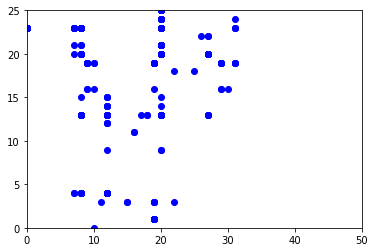

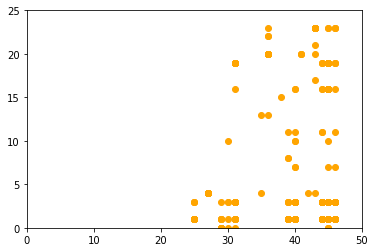

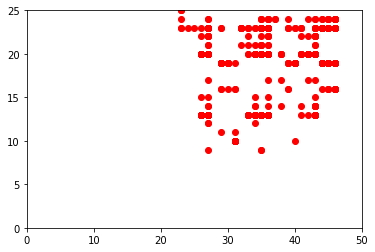

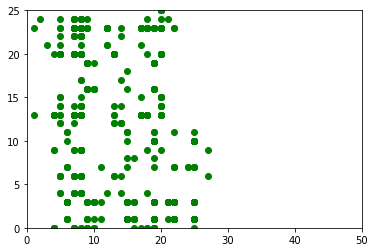

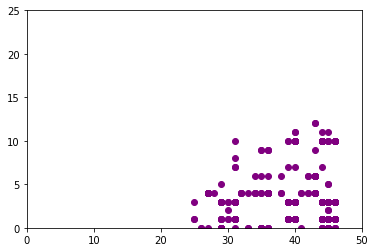

In [510]:
colors = ['blue', 'orange', 'red', 'green', 'purple']

cluster = {}
for i in range(5):
    cluster_i = encodedvals[kfit.labels_ == i, :]
    cluster[i] = pd.DataFrame(cluster_i)
    plt.scatter( x=cluster_i[:,0], y=cluster_i[:,1], c=colors[i]) 
    plt.xlim([0,50])
    plt.ylim([0,25])
    plt.show()


In [508]:
print(len(cluster[1]))

548


In [273]:
cluster1 = pd.DataFrame(cluster_i)

In [560]:
cluster1.iloc[:,:-2]

,0,1,2,3,4,5
0,32.0,23.0,17.0,0.0,3.0,24.0
1,32.0,21.0,19.0,4.0,3.0,28.0
2,40.0,3.0,25.0,2.0,3.0,11.0
3,36.0,13.0,16.0,5.0,3.0,10.0
4,43.0,20.0,16.0,4.0,3.0,10.0
...,...,...,...,...,...,...
2494,46.0,23.0,3.0,2.0,3.0,0.0
2495,40.0,1.0,21.0,2.0,3.0,0.0
2496,46.0,1.0,25.0,2.0,3.0,0.0
2497,43.0,23.0,40.0,3.0,3.0,0.0


In [586]:
clabel = []
for frame in label:
    cframe = pd.DataFrame()
    for column in frame.iloc[:,:-3]:
        if len((frame[column].value_counts())) == 1:
            print("not_ok")
        else:
            print('ok')
            cframe = pd.concat([cframe,frame[column]],axis=1)
    clabel.append(cframe)
    
#cardinality=1 dropped

ok
ok
ok
ok
ok
ok
ok
ok
not_ok
not_ok
ok
ok
ok
not_ok
not_ok
ok
ok
not_ok
not_ok
not_ok
ok
ok
not_ok
ok
ok
ok
ok
not_ok
ok
not_ok
not_ok
ok
ok
ok
ok
ok
not_ok
not_ok
not_ok
not_ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
not_ok
not_ok
ok
ok
ok
ok
not_ok
ok
not_ok
ok
not_ok
ok
ok
not_ok
not_ok
ok
ok
not_ok
not_ok
ok
ok
ok
ok
ok
ok
ok
ok
not_ok
not_ok
not_ok
not_ok
not_ok
not_ok
not_ok
not_ok
not_ok
ok
not_ok
ok
not_ok
ok
ok
ok
ok
ok
ok
not_ok
not_ok
ok
not_ok
not_ok
ok
not_ok
ok
ok
ok
ok
ok
ok
ok
ok
not_ok
not_ok
ok
not_ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
not_ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
not_ok
ok
ok
ok
ok
ok
ok
not_ok
ok
ok
ok
ok
ok
ok
not_ok
ok
ok
ok
ok
ok
ok
ok
ok
not_ok
not_ok
ok
ok
ok
ok
ok
not_ok
not_ok
ok
ok
ok
ok
not_ok
ok
ok
ok
ok
ok
not_ok
ok
not_ok
not_ok
ok
ok
ok
not_ok
not_ok
ok
not_ok
ok
ok
not_ok
not_ok
ok
not_ok
ok
not_ok
ok
not_ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
not_ok
ok
ok
not_ok
not_ok
ok
not_ok
ok
not_ok
not_ok
ok
ok
ok
ok
ok
not_ok
not_ok
ok
not_o

,0,1,2,3,4,5,6,7,10,11,...,361,362,363,365,366,367,368,369,371,372
2,20.0,24.0,34.0,2.0,3.0,27.0,9.0,23.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,20.0,21.0,34.0,5.0,3.0,27.0,11.0,4.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20.0,23.0,34.0,5.0,3.0,12.0,3.0,13.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,9.0,19.0,25.0,5.0,3.0,10.0,7.0,18.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10,29.0,19.0,38.0,5.0,3.0,10.0,7.0,15.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,9.0,16.0,26.0,5.0,3.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4157,20.0,13.0,34.0,5.0,3.0,0.0,6.0,5.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4172,20.0,20.0,34.0,5.0,3.0,0.0,6.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4202,12.0,13.0,39.0,2.0,3.0,0.0,3.0,17.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [587]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [577]:
label[1][0].value_counts()

40.0    122
46.0     80
45.0     75
44.0     68
36.0     47
27.0     35
39.0     34
31.0     26
43.0     22
29.0     14
25.0     13
30.0      5
41.0      3
35.0      2
42.0      1
38.0      1
Name: 0, dtype: int64

In [564]:
trainset_x = {}
trainset_y = {}
for x in range(len(label)):
    trainset_x[x] = label[x].iloc[:,:-3].values
    trainset_y[x] = label[x]['y'].values

In [24]:
clf = xgb.XGBClassifier()
clf.fit(
    trainset_x[0],
    trainset_y[0],
)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

ValueError: could not convert string to float: 'az'